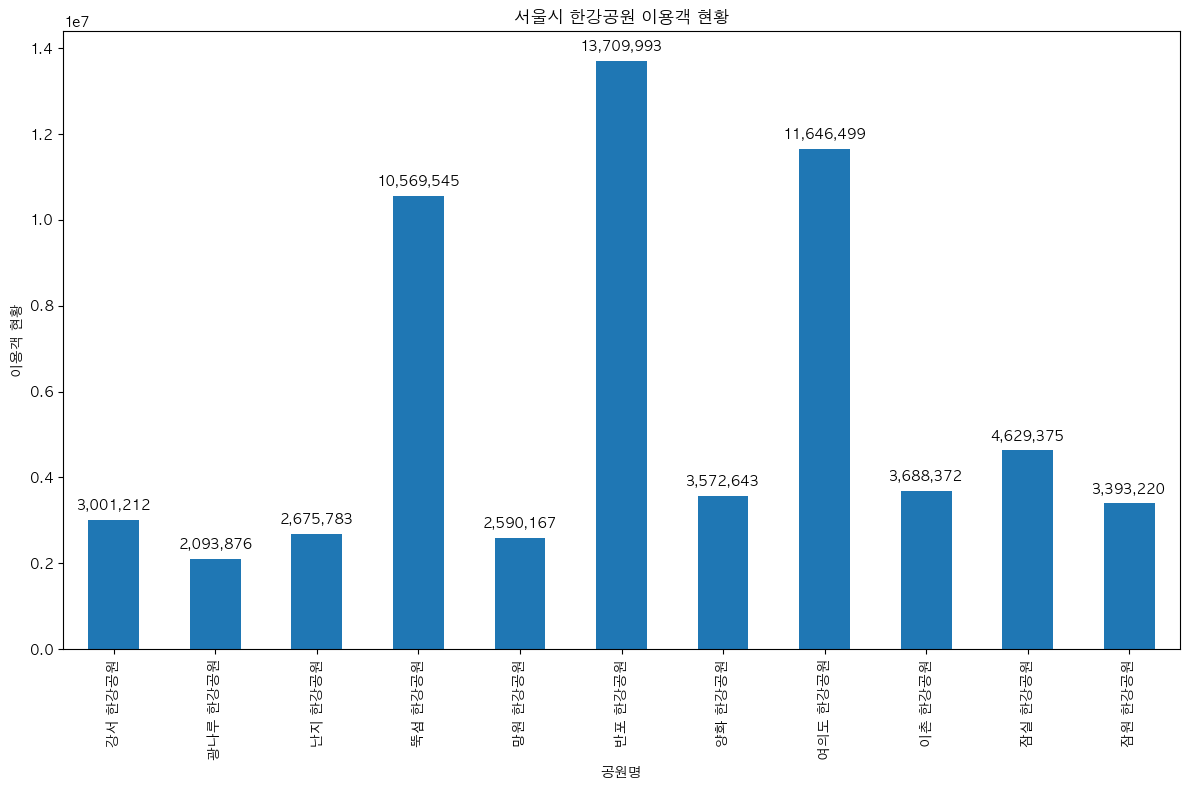

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = "/System/Library/Fonts/Supplemental/AppleGothic.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

file_path = '서울시 한강공원 이용객 현황.csv'

df = pd.read_csv(file_path, encoding='cp949', low_memory=False)

people_columns = df.columns[7::]
df[people_columns] = df[people_columns].apply(pd.to_numeric, errors='coerce')

grouped_df = df.groupby('공원명').sum()

grouped_df['이용객 현황'] = grouped_df.iloc[:, 7::].sum(axis=1)

plt.figure(figsize=(12, 8))
ax = grouped_df['이용객 현황'].plot(kind='bar')
plt.title('서울시 한강공원 이용객 현황')
plt.xlabel('공원명')
plt.ylabel('이용객 현황')

# 막대 위에 실제 수치 표시
for p in ax.patches:
    ax.annotate(format(p.get_height(), ',.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

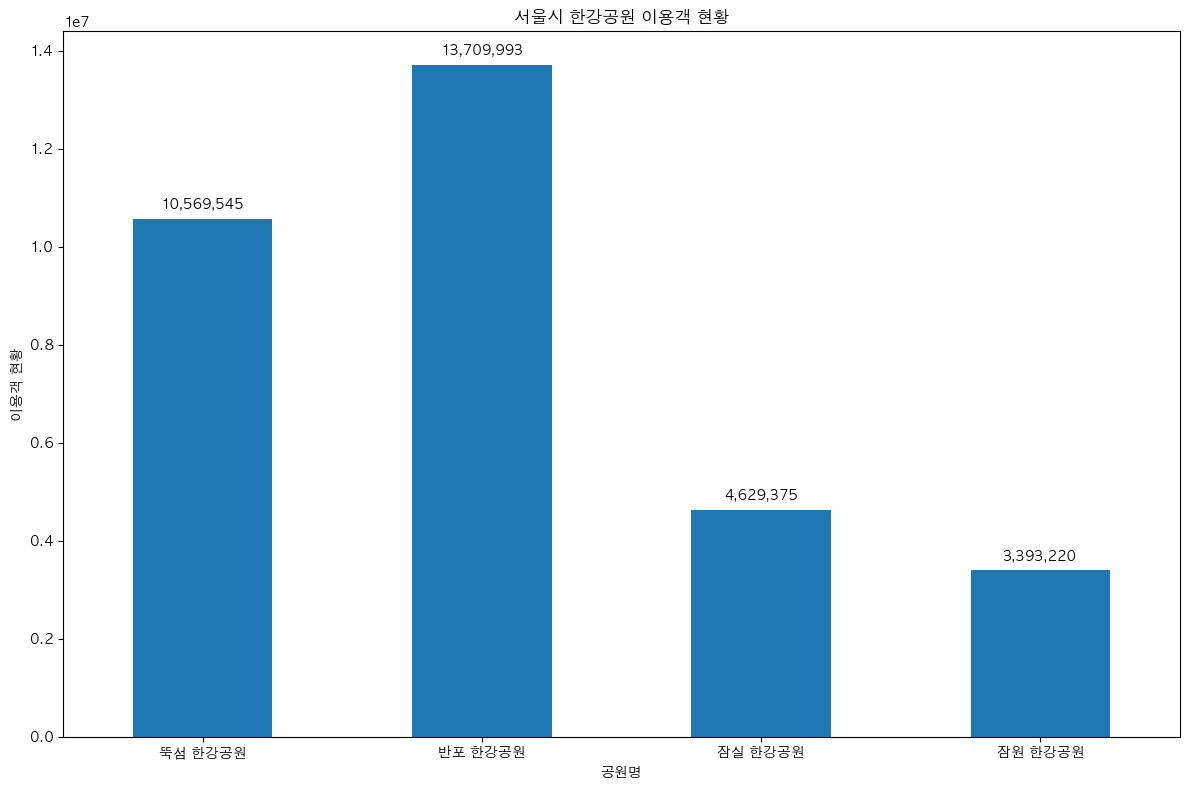

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = "/System/Library/Fonts/Supplemental/AppleGothic.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

file_path = '서울시 한강공원 이용객 현황.csv'

df = pd.read_csv(file_path, encoding='cp949', low_memory=False)

people_columns = df.columns[7:]
df[people_columns] = df[people_columns].apply(pd.to_numeric, errors='coerce')

grouped_df = df.groupby('공원명').sum()

grouped_df['이용객 현황'] = grouped_df.iloc[:, 7:].sum(axis=1)

bridge_parks = ['뚝섬 한강공원', '잠원 한강공원', '반포 한강공원', '잠실 한강공원']
filtered_df = grouped_df[grouped_df.index.isin(bridge_parks)]

plt.figure(figsize=(12, 8))
ax = filtered_df['이용객 현황'].plot(kind='bar')
plt.title('서울시 한강공원 이용객 현황')
plt.xlabel('공원명')
plt.ylabel('이용객 현황')
plt.xticks(rotation=360)

# 막대 위에 실제 수치 표시
for p in ax.patches:
    ax.annotate(format(p.get_height(), ',.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.tight_layout()
plt.show()